In [2]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Khởi tạo đối tượng

In [5]:
analyzer = SentimentIntensityAnalyzer()

- Đoạn văn bản ngẫu nhiên

In [15]:
sentence = "Today is a nice day."

- Lấy ra dictionary của kết quả phân tích, kết quả trả về gồm những field sau:
    - neg: mức độ tiêu cực.
    - neu: mức độ trung bình.
    - pos: mức độ tích cực.
    - compound: là tổng được chuẩn hóa và điều chỉnh bởi các field còn lại, những mốc tiêu chuẩn mà thư viện đặt ra:
        - compound >= 0.05: tích cực.
        - compound <= -0.05: tiêu cực.
        - -0.05 < compound < 0.05: trung bình. 

        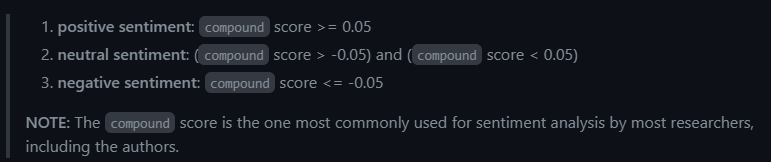


- neu, neg, pos: Thực chất là tỉ lệ các từ mỗi loại của đoạn văn bản đó.

In [16]:
analyzer.polarity_scores(sentence)

{'neg': 0.0, 'neu': 0.588, 'pos': 0.412, 'compound': 0.4215}

In [30]:
def get_sentiment(sentence: str):
    sentiment = analyzer.polarity_scores(sentence)["compound"]
    if (sentiment >= 0.05):
        return "Tích cực", {"compound score": sentiment}
    elif (sentiment <= -0.05):
        return "Tiêu cực", {"compound score": sentiment}
    else:
        return "Trung bình", {"compound score": sentiment}

# Test một vài trường hợp

In [25]:
pos_sentence = "I freaking love it!"
get_sentiment(pos_sentence) 

('Tích cực', {'compound score': 0.4003})

In [33]:
neu_sentence = "This song is mid."
get_sentiment(neu_sentence)

('Trung bình', {'compound score': 0.0})

In [34]:
neg_sentence = "Why don't you go to hell?"
get_sentiment(neg_sentence)

('Tiêu cực', {'compound score': -0.6808})

# Test một vài câu phức tạp hơn.

In [36]:
test_case1 = """
Despite facing setbacks in the initial stages of the project, the resilient team persevered, 
learned valuable lessons, and ultimately achieved success in delivering a product that exceeded expectations.
"""
get_sentiment(test_case1)

('Tích cực', {'compound score': 0.7783})

In [38]:
test_case2 = """
After the unexpected turn of events, the protagonist found themselves in a perplexing situation, 
navigating a complex web of emotions and uncertainties.
"""
get_sentiment(test_case2)

('Tiêu cực', {'compound score': -0.34})

In [39]:
test_case3 = """
Despite the anticipation surrounding the highly-anticipated game release, 
players were met with a slew of game-breaking bugs and unoptimized graphics, 
leading to a collective sense of disappointment and frustration within the gaming community
"""
get_sentiment(test_case3)

('Tiêu cực', {'compound score': -0.7715})